# [Homework 2](http://work.caltech.edu/homework/hw2.pdf) of [CS156](http://work.caltech.edu/telecourse.html).

## Hoeffding Inequality 

Run a computer simulation for flipping **1,000** virtual fair coins. Flip each coin independently **10** times. Focus on 3 coins as follows: _c1_ is the first coin flipped, _crand_ is a coin chosen randomly from the 1,000, and _cmin_ is the coin which had the minimum frequency of heads (pick the earlier one in case of a tie). Let **ν1**, **νrand**, and **νmin** be the fraction of heads obtained for the **3** respective coins out of the **10** tosses.
Run the experiment **100,000** times in order to get a full distribution of **ν1**, **νrand**, and **νmin** (note that crand and cmin will change from run to run).

#### 1.The average value of νmin is closest to:

[a] 0

**[b] 0.01**

[c] 0.1

[d] 0.5

[e] 0.67

### Answer:
**Intuitively**, we can guess that the answer should be **0.5** since after a huge number of tosses the probability of getting heads is irrelevant to the 3 given coin picking methods if the coins are fair.

#### However, it is no harm to experiment with codes:

In [1]:
# First import the random library
import random

In [2]:
# Define a coin class:
class Coin:
    def __init__(self):
        self.last_toss = None
        self.hist_toss = []
    
    def toss(self):
        """
        1 is head
        0 is tail
        """
        self.last_toss = 1 if random.random() > 0.5 else 0
    
    def record(self):
        self.hist_toss.append(self.last_toss)
        
    def count_head(self):
        return sum(self.hist_toss)

For v1 it is simple. It is just equivalent to toss a coin for 100000 * 10 times:

In [3]:
coin = Coin()
for i in range(100000 * 10):
    coin.toss()
    coin.record()
v1 = coin.count_head() / (100000 * 10)
print(v1)

0.500299


For vrand and vmin, we need to construct a list of 1000 coins

In [4]:
# Define experiment for vrand:
def vrand_toss(num: int):
    """
    num: Number of experiments.
    """
    vrand_pick = None
    coin_ls = [Coin() for i in range(1000)] # It's better to define a new ls every experiment inside the function.
    for t in range(num):
        for coin in coin_ls:
            coin.toss()
            coin.record()
    vrand_pick = [coin.count_head() for coin in coin_ls][random.randint(0, 999)]
    print(vrand_pick)
    return vrand_pick / num

vrand_toss(1000)

506


0.506

The above code is rather inefficient, though it can do the job.

In [5]:
# Define experiment for vmin:
def vmin_toss():
    """
    num: Number of experiments.
    """
    vmins = None
    coin_ls = [Coin() for i in range(1000)] # It's better to define a new ls every experiment inside the function.
    for t in range(10):
        for coin in coin_ls:
            coin.toss()
            coin.record()
    # print([coin.count_head() for coin in coin_ls])
    vmins = min([coin.count_head() for coin in coin_ls])
    return vmins / 10

exp_n = 1000
sum([vmin_toss() for i in range(exp_n)]) / exp_n

0.03670000000000025

Thus, we can know that our intuition is correct for v1 and vrand, but not for vmin. Thus the answer for question 1 should be **[b] 0.01**.

#### 2.Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding Inequality?

[a] c1 only

[b] crand only

[c] cmin only

**[d] c1 and crand**

[e] cmin and crand

### Answer:
From question 1 we can find out that **[d] c1 and crand** is the correct answer.

The experiment shows that v1 and vrand are approximate to 0.5, the actual out-of-sample probability of getting a head given that coins are fair. The vmin is minipulated which resulted in abnormal low probability of head.

## Error and Noise

Consider the bin model for a hypothesis **h** that makes an error with probability **µ** in approximating a deterministic target function **f** (both **h** and **f** are __binary functions__).

If we use the same **h** to approximate a noisy version of **f** given by:

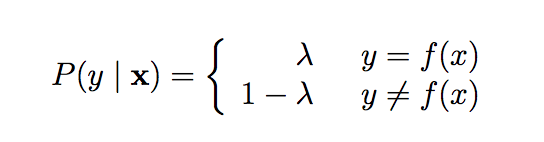

#### 3.What is the probability of error that h makes in approximating y? Hint: Two wrongs can make a right!

[a] µ

[b] λ

[c] 1-µ

[d] (1 − λ) ∗ µ + λ ∗ (1 − µ)

**[e] (1 − λ) ∗ (1 − µ) + λ ∗ µ**

There are two kinds of error, true error and false correct.

P(true error) = (1-µ) * (1-λ)

P(false correct) = µ * λ

#### 4.At what value of λ will the performance of h be independent of μ?
[a] 0

**[b] 0.5**

[c] 1/√2

[d] 1

[e] No values of λ


If the performance of h is to be independent of μ, then it is the same as saying that the target function is totally random. When λ = 0.5, which means that the f is not the case half of the time. When we think of a fair coin toss, we can assume a similar situation:

$P(y|X) = \{ 0.5  y = f(x) ; 0.5 y \neq f(x)\}$

Where $f(x)$ can be think of $f(x) = "head"$. Naturally, y \neq f(x) means "not head", or "tail".

Thus, we can see that when $\lambda = 0.5$, the target function is like a coin toss which will make the hypothesis useless no matter what.

## Linear Regression

In these problems, we will explore how Linear Regression for classification works. As with the Perceptron Learning Algorithm in Homework # 1, you will create your own **target function f** and **data set D**. Take **d = 2** so you can visualize the problem, and assume **X = [−1, 1] × [−1, 1]** with uniform probability of picking each **x ∈ X**. 

In each run, choose a random line in the plane as your target function **f** (do this by taking two random, uniformly distributed points in [−1, 1] × [−1, 1] and taking the line passing through them), where one side of the line maps to +1 and the other maps to −1. Choose the inputs $x_n$ of the data set as random points (uniformly in **X**), and evaluate the target function on each xn to get the corresponding output $y_n$.

5.Take N = 100. Use Linear Regression to find g and evaluate Ein, the fraction of in-sample points which got classified incorrectly. Repeat the experiment 1000 times and take the average (keep the g’s as they will be used again in Problem 6). Which of the following values is closest to the average Ein? (Closest is the option that makes the expression |your answer − given option| closest to 0. Use this definition of closest here and throughout.)

[a] 0

[b] 0.001

[c] 0.01

[d] 0.1

[e] 0.5

To use linear regression, we can always come to the so-called 'one-step learning' method first, which is derived [here](https://zhuanlan.zhihu.com/p/33405427). For short, use the formula:

$$ w = (X^\top X)^{-1}X^\top y $$

to do it. Most part of the program in problem 1 can be reused.